In [315]:
%matplotlib notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import numpy as np
import math as m

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
from matplotlib import ticker

## Step 1: Function evaluations 
Evaluation of the objective function and its gradient given a specific point $p$, number of segments $n$, segment lenghts $l$ and a set of configuration angles $v$. 

In [430]:
def evalu(n,l,p0,v):
    
    cums = np.cumsum(v)
    f = np.zeros(2)
    g = np.zeros(2)
    ggh = np.zeros((n,2))
    grad_g = np.zeros((n,2))
    
    for i in range(n):
        
        c = m.cos(cums[i])
        s = m.sin(cums[i])
        
        f[0] = (l[i]*c)+f[0]
        f[1] = (l[i]*s)+f[1]
        
    
    for i in range(n):
        
            if i == 0:
                
                for j in range(n):
                    s = m.sin(cums[j])
                    c = m.cos(cums[j])
            
                    ggh[i,0] = l[j]*(-s)+ggh[i,0]
                    ggh[i,1] = l[j]*(c)+ggh[i,1]
                
            else:
                
                for j in range(i,n):
                        
                    s = m.sin(cums[j])
                    c = m.cos(cums[j])
            
                    ggh[i,0] = l[j]*(-s)+ggh[i,0]
                    ggh[i,1] = l[j]*(c)+ggh[i,1]
               
            
    g[0] = 0.5*(f[0]-p0[0])**2
    g[1] = 0.5*(f[1]-p0[1])**2
    g = g[0]+g[1]
    
    grad_g = ggh @ (f-p0)
    
    
    return g, grad_g



        
        
        




## Step 2:Line search
The first thing we will do is to find the line search using "Backtracking Armijo".

In [431]:
def BacktrackLineSearch(vk, gk, ggk, pk, ak, c, rho, nmaxls=100):
    
    pkggk = pk @ ggk
   
    g,ggk = evalu(n,l,p0,vk+ak*pk)
    
    for i in range (nmaxls):
        if g <= gk + c*ak*pkggk:
            break
        ak *= rho
        g,ggk = evalu(n,l,p0,vk+ak*pk)
        
    return ak

Then, we need to compute the search direction. For Gradient descent, this is simply $p_{k+1}=-\nabla f(x_{k+1})$, and we have already computed this during the first step.

## Step 3:Optimization
Now we need to compute the search direction, perform line search along this direction and then perform the step.

In [432]:
def optimize(n, l, p0, v0, c, rho, tol,nmax):
    
    vk = v0
    listofAng = np.zeros((nmax,3))
    listofAng[0] = v0;
    gk,ggk = evalu(n,l,p0,vk)
    pk = None
    ak = 1
    
    
    for k in range(1,nmax):
        
        ak = 1
        pk = -ggk   #The search direction for steepest descent is simply the gradient
        ak = BacktrackLineSearch(vk, gk, ggk, pk, ak, c, rho)
        listofAng[k] = vk + np.multiply(ak, pk)
        vk = listofAng[k]
        gk,ggk = evalu(n,l,p0,vk) 
        
        if np.linalg.norm(ggk) < tol:
            break
    
    return listofAng
    

In [433]:
def ROBOT_PLT(n, l, p0, v):
    
    f = np.zeros(2)
    temp0 = np.zeros(n)
    temp = np.zeros(2)    
    
    c = m.cos(v[0])
    s = m.sin(v[0])
    f[0] = (l[0]*c)
    f[1] = (l[0]*s)
    temp0[0] = v[0]
    x_values = (0,f[0])
    y_values = (0,f[1])
    plt.plot(x_values, y_values)
    plt.scatter(f[0],f[1],s=300)


    for i in range(1,n):

            temp[0]=f[0]
            temp[1]=f[1]
            c = m.cos(v[i]+np.sum(temp0))
            s = m.sin(v[i]+np.sum(temp0))

            f[0] = (l[i]*c)+f[0]
            f[1] = (l[i]*s)+f[1]
            temp0[i] = v[i]
         
            x_values = (temp[0],f[0])
            y_values = (temp[1],f[1])
            plt.plot(x_values, y_values)
            plt.scatter(f[0],f[1],s=300)

    plt.scatter(0,0)        
    plt.scatter(3,2)
    plt.show()

    

In [434]:
def OPT_PLT(n, l, p0, v):
    
    f = np.zeros(2)
    temp0 = np.zeros(n)
    temp = np.zeros(2)    
    
    c = m.cos(v[0])
    s = m.sin(v[0])
    f[0] = (l[0]*c)
    f[1] = (l[0]*s)
    temp0[0] = v[0]


    for i in range(1,n):

            temp[0]=f[0]
            temp[1]=f[1]
            c = m.cos(v[i]+np.sum(temp0))
            s = m.sin(v[i]+np.sum(temp0))

            f[0] = (l[i]*c)+f[0]
            f[1] = (l[i]*s)+f[1]
            temp0[i] = v[i]
            
            
    plt.scatter(f[0],f[1],marker='x',s=50)        
    plt.scatter(3,2,color='black')
    plt.show()

    

[[0.         1.         1.        ]
 [0.50099857 1.06207773 1.21266207]
 [0.30747502 1.26989228 1.31496846]
 [0.39217978 1.21383865 1.30745881]
 [0.3855082  1.22833125 1.31632333]
 [0.39612085 1.227761   1.32041815]
 [0.39252921 1.23120409 1.321637  ]
 [0.39336926 1.23054386 1.32146983]
 [0.39323878 1.2307137  1.3215498 ]
 [0.39328849 1.23069575 1.32155684]
 [0.39329146 1.23072126 1.32157858]
 [0.39330167 1.23071264 1.32157606]
 [0.39329982 1.23071463 1.32157687]
 [0.39330034 1.23071432 1.32157684]
 [0.39330027 1.23071456 1.321577  ]
 [0.3933004  1.23071445 1.32157697]
 [0.39330037 1.23071448 1.32157698]
 [0.39330038 1.23071447 1.32157698]
 [0.39330038 1.23071447 1.32157698]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.  

<IPython.core.display.Javascript object>


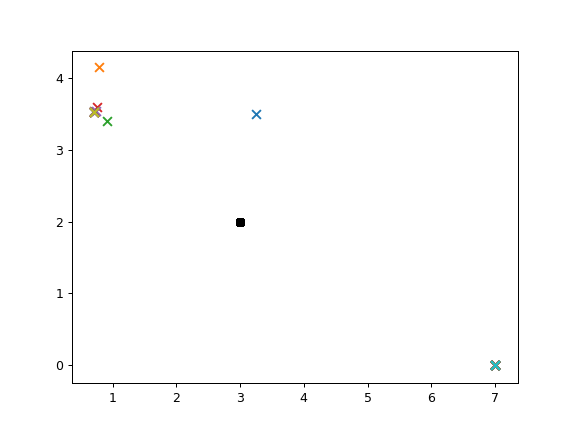

<IPython.core.display.Javascript object>


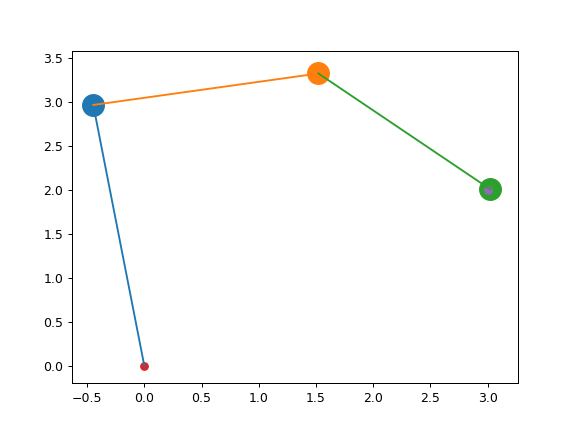

[0. 0. 0.]


<IPython.core.display.Javascript object>


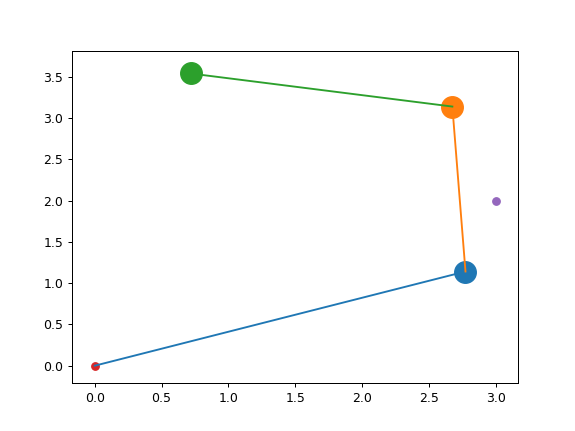

In [442]:
#Input arguments
n = 3  #Number of segments
l = np.array([3, 2, 2])
p0 = np.array([3, 2])



#Initial conditions
#v0 = np.array([1.72, -1.54, -0.9])
v0 = np.array([0,1,1])




#Algorithm parameters
c = 0.01
rho = 0.5
tol = 1e-8
nmax = 200

vgd = optimize(n, l, p0, v0, c, rho, tol,nmax)




topi = 2*m.pi
for i in range(nmax):
    for j in range(n):
        if vgd[i,j]>topi:
            fac = int(vgd[i,j]/(topi))
            vgd[i,j] = vgd[i,j]-(topi*fac)
        elif vgd[i,j]<0:
            fac = int(vgd[i,j]/(topi))
            vgd[i,j] = vgd[i,j]-(topi*fac)
            vgd[i,j] = -vgd[i,j]
            
###############################################################################################################################""



print(vgd)


################################################################################################################################
#          PLOT
################################################################################################################################


for i in range(nmax):
    OPT_PLT(n, l, p0, vgd[i])



SOLUTION = np.array([1.72, -1.54, -0.9])
plt.figure()
ROBOT_PLT(n, l, p0, SOLUTION)

print(vgd[nmax-1])

SOLUTION = np.array([0.39, 1.23, 1.32])
plt.figure()
ROBOT_PLT(n, l, p0, SOLUTION)






